In [1]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

d:\anaconda\envs\tensorflow2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()
 
val_datagen=ImageDataGenerator()


In [3]:
train_generator = train_datagen.flow_from_directory(
        'C:/Users/aksha/Desktop/Artificial/train',
        target_size=(32,32),
        batch_size=128,
        class_mode='categorical')

Found 59800 images belonging to 46 classes.


In [4]:
test_generator = test_datagen.flow_from_directory(
        'C:/Users/aksha/Desktop/Artificial/test',
        target_size=(32,32),
        batch_size=128,
        class_mode='categorical')

Found 18400 images belonging to 46 classes.


In [5]:
val_generator = val_datagen.flow_from_directory(
        'C:/Users/aksha/Desktop/Artificial/val',
        target_size=(32,32),
        batch_size=64,
        class_mode='categorical')

Found 13800 images belonging to 46 classes.


In [6]:
model_1=Sequential()
model_1.add(Conv2D(64,(3,3), strides=(1, 1), padding='same', input_shape=(32,32,3),activation='relu'))
model_1.add(Conv2D(64,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(BatchNormalization())

model_1.add(Conv2D(128,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(Conv2D(128,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(BatchNormalization())

model_1.add(Conv2D(256,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(Conv2D(256,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(BatchNormalization())

model_1.add(Conv2D(512,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(Conv2D(512,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(Conv2D(512,(3,3), strides=(1, 1), padding='same',activation='relu'))
model_1.add(Flatten())
model_1.add(Dense(4096, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(46,activation='softmax'))
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
__________

In [7]:
model_1.compile(loss='binary_crossentropy',
              optimizer=SGD(lr=1e-3, momentum=0.9),
              metrics=['accuracy'])

In [8]:
history=model_1.fit_generator(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    validation_steps=117)  

Epoch 1/50
468/468 [==============================] - 96s 206ms/step - loss: 0.1045 - acc: 0.9783 - val_loss: 0.1035 - val_acc: 0.9783
Epoch 2/50
468/468 [==============================] - 62s 132ms/step - loss: 0.1024 - acc: 0.9783 - val_loss: 0.1016 - val_acc: 0.9783
Epoch 3/50
468/468 [==============================] - 62s 133ms/step - loss: 0.1001 - acc: 0.9783 - val_loss: 0.0991 - val_acc: 0.9783
Epoch 4/50
468/468 [==============================] - 62s 133ms/step - loss: 0.0968 - acc: 0.9783 - val_loss: 0.0953 - val_acc: 0.9783
Epoch 5/50
468/468 [==============================] - 62s 133ms/step - loss: 0.0918 - acc: 0.9783 - val_loss: 0.0894 - val_acc: 0.9783
Epoch 6/50
468/468 [==============================] - 62s 132ms/step - loss: 0.0843 - acc: 0.9784 - val_loss: 0.0807 - val_acc: 0.9785
Epoch 7/50
468/468 [==============================] - 62s 133ms/step - loss: 0.0744 - acc: 0.9792 - val_loss: 0.0702 - val_acc: 0.9798
Epoch 8/50
468/468 [==============================] - 6

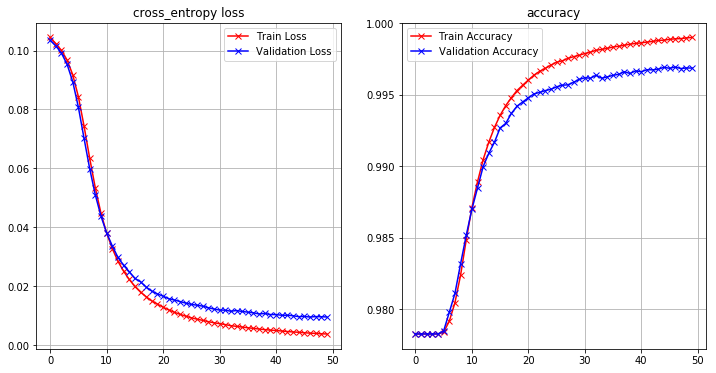

In [9]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["acc"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_acc"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

In [10]:
model_1.evaluate_generator(test_generator)

[0.011348437145352363, 0.995936918258667]

In [11]:
custom_test_datagen=ImageDataGenerator()

In [12]:
custom_test_generator = custom_test_datagen.flow_from_directory(
        'C:/Users/aksha/Desktop/Artificial/customdata',
        target_size=(32,32),
        class_mode='categorical')

Found 10 images belonging to 1 classes.


In [13]:
np.argmax(model_1.predict_generator(custom_test_generator),axis=1)

array([29, 39, 44, 22, 10, 31, 40, 27, 24, 20], dtype=int64)

In [14]:
model_1.save("VGG model.h5")

In [15]:
model_1.save_weights("VGG weights.h5")